In [1]:
import requests
from bs4 import BeautifulSoup
import re
import os
from PIL import Image, ImageDraw, ImageFont
from os.path import join
import numpy as np
import matplotlib.pyplot as plt

In [2]:
URL = 'https://chineseplus.ru/leksika-dlya-hsk?field_level_hsk_tid=All'
HEADERS = {'user-agent': 'Mozilla/5.0 (Linux; Android 6.0; Nexus 5 Build/MRA58N) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/95.0.4638.54 Mobile Safari/537.36 Edg/95.0.1020.40', 'accept': '*/*'}

def get_html(url, params=None):
    r = requests.get(url, headers=HEADERS, params=params)
    return r

def get_pages_count(html):
    soup = BeautifulSoup(html, 'html.parser')
    if(soup.find('li', class_='pager-last')):
        pagination = int(soup.find('li', class_='pager-last').find_next('a').get('href').split('=')[-1])
        return pagination
    else:
        return 1
    
def get_content(html):
    soup = BeautifulSoup(html, 'html.parser')
    items = soup.find_all('td', class_='views-field views-field-title')
    letters = set()
    for item in items:
        word = list(item.get_text(strip=True))
        for letter in word:
            letters.add(letter)
    return letters
        
def parse():
    html = get_html(URL)
    if html.status_code == 200:      
        letters = get_content(html.text)
        pages_count = get_pages_count(html.text)
        for page in range(1, pages_count + 1):
            print(f'Парсинг страницы {page + 1} из {pages_count + 1}...')
            html = get_html(URL, params={'page': page})
            letters.update(get_content(html.text))
        print(f'Получено {len(letters)} иероглифов')
        return letters
    else:
        print('Error')

letters = parse()

Парсинг страницы 2 из 50...
Парсинг страницы 3 из 50...
Парсинг страницы 4 из 50...
Парсинг страницы 5 из 50...
Парсинг страницы 6 из 50...
Парсинг страницы 7 из 50...
Парсинг страницы 8 из 50...
Парсинг страницы 9 из 50...
Парсинг страницы 10 из 50...
Парсинг страницы 11 из 50...
Парсинг страницы 12 из 50...
Парсинг страницы 13 из 50...
Парсинг страницы 14 из 50...
Парсинг страницы 15 из 50...
Парсинг страницы 16 из 50...
Парсинг страницы 17 из 50...
Парсинг страницы 18 из 50...
Парсинг страницы 19 из 50...
Парсинг страницы 20 из 50...
Парсинг страницы 21 из 50...
Парсинг страницы 22 из 50...
Парсинг страницы 23 из 50...
Парсинг страницы 24 из 50...
Парсинг страницы 25 из 50...
Парсинг страницы 26 из 50...
Парсинг страницы 27 из 50...
Парсинг страницы 28 из 50...
Парсинг страницы 29 из 50...
Парсинг страницы 30 из 50...
Парсинг страницы 31 из 50...
Парсинг страницы 32 из 50...
Парсинг страницы 33 из 50...
Парсинг страницы 34 из 50...
Парсинг страницы 35 из 50...
Парсинг страницы 36 из

In [3]:
#letters = set()
import codecs
with codecs.open('chinese-word-list.txt', encoding = 'utf-8') as f:
    for line in f:
        line = re.sub("\s+|\n|\r|\d+|", '', line)
        for chin in re.findall(r'[\u3400-\u4BDF\u4E00-\u9FFF\uF900-\uFAFF\u3400-\u4BDF\u4E00-\u9FFF\uF900-\uFAFF]', line):
            for letter in line:
                letters.add(letter)
#print(letters)
f.closed

True

In [5]:
path_to_fonts = 'font'
filelist = []
for root, dirs, files in os.walk(path_to_fonts): 
    for file in files: 
        filelist.append(os.path.join(root,file))
size = [30,35,40,45]

In [9]:
counter = 0
X_data = []
Y_data = []
for file in filelist:
    print(file)
    for size_letter in size:
        print(size_letter)
        counter  = 0
        for letter in list(letters):
            img = Image.new('RGB', (64, 64), 'white')
            idraw = ImageDraw .Draw(img)
            line = ImageFont.truetype(file, size = size_letter, encoding='utf-8')
            idraw.text((5, 5), letter, font = line, fill = 'black')
            X_data.append(np.asarray(img).astype('int8'))
            Y_data.append(letter)
            counter = counter + 1
            if(not counter%1000):
                print(f'Создано картинок {counter} из {len(letters)}...')
X_data = np.array(X_data)

font\chinese.msyh.ttf
30
Создано картинок 1000 из 8186...
Создано картинок 2000 из 8186...
Создано картинок 3000 из 8186...
Создано картинок 4000 из 8186...
Создано картинок 5000 из 8186...
Создано картинок 6000 из 8186...
Создано картинок 7000 из 8186...
Создано картинок 8000 из 8186...
35
Создано картинок 1000 из 8186...
Создано картинок 2000 из 8186...
Создано картинок 3000 из 8186...
Создано картинок 4000 из 8186...
Создано картинок 5000 из 8186...
Создано картинок 6000 из 8186...
Создано картинок 7000 из 8186...
Создано картинок 8000 из 8186...
40
Создано картинок 1000 из 8186...
Создано картинок 2000 из 8186...
Создано картинок 3000 из 8186...
Создано картинок 4000 из 8186...
Создано картинок 5000 из 8186...
Создано картинок 6000 из 8186...
Создано картинок 7000 из 8186...
Создано картинок 8000 из 8186...
45
Создано картинок 1000 из 8186...
Создано картинок 2000 из 8186...
Создано картинок 3000 из 8186...
Создано картинок 4000 из 8186...
Создано картинок 5000 из 8186...
Создано к

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


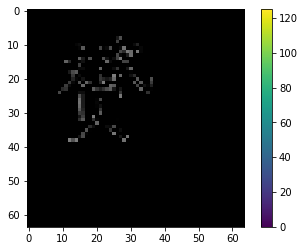

赟


In [10]:
num = np.random.randint(0, len(X_data))
fig = plt.figure()
plt.imshow(X_data[num])
plt.colorbar()
plt.grid(False)
plt.show()

print(Y_data[num])

In [9]:
def identity_block(X, f, filters, stage, block):
    """
    Implementation of the identity block as defined in Figure 4
    
    Arguments:
    X -- input tensor of shape (m, n_H_prev, n_W_prev, n_C_prev)
    f -- integer, specifying the shape of the middle CONV's window for the main path
    колличество фильтров
    filters -- python list of integers, defining the number of filters in the CONV layers of the main path
    stage - номер слоя (число)
    block -- string/character, used to name the layers, depending on their position in the network
    (тоже самое?)
    Returns:
    X -- output of the identity block, tensor of shape (n_H, n_W, n_C)
    """
    
    conv_name_base = 'res' + str(stage) + block + '_branch'
    bn_name_base = 'bn' + str(stage) + block + '_branch'
    
    F1, F2, F3 = filters
    X_shortcut = X
    
    # First component of main path
    X = Conv2D(filters = F1, kernel_size = (1, 1), strides = (1,1), padding = 'valid', name = conv_name_base + '2a', kernel_initializer = glorot_uniform(seed=0))(X) 
    X = BatchNormalization(axis = 3, name = bn_name_base + '2a')(X)
    X = Activation('relu')(X)
    
    # Second component of main path (≈3 lines)
    X = Conv2D(filters = F2, kernel_size = (f,f), strides = (1,1), padding = 'same', name = conv_name_base + '2b', kernel_initializer = glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis = 3, name = bn_name_base + '2b')(X)
    X = Activation('relu')(X)

    # Third component of main path (≈2 lines)
    X = Conv2D(filters = F3, kernel_size = (1,1), strides = (1,1), padding = 'valid', name = conv_name_base + '2c', kernel_initializer = glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis = 3, name = bn_name_base + '2c')(X)
    
    # Final step: Add shortcut value to main path, and pass it through a RELU activation (≈2 lines)
    X = Add()([X, X_shortcut])
    X = Activation('relu')(X)
    
    return X

In [10]:
def convolutional_block(X, f, filters, stage, block, s = 2):
    """
    Implementation of the convolutional block as defined in Figure 4
    
    Arguments:
    X -- input tensor of shape (m, n_H_prev, n_W_prev, n_C_prev)
    f -- integer, specifying the shape of the middle CONV's window for the main path
    filters -- python list of integers, defining the number of filters in the CONV layers of the main path
    stage -- integer, used to name the layers, depending on their position in the network
    block -- string/character, used to name the layers, depending on their position in the network
    s -- Integer, specifying the stride to be used
    
    Returns:
    X -- output of the convolutional block, tensor of shape (n_H, n_W, n_C)
    """
    
    # defining name basis
    conv_name_base = 'res' + str(stage) + block + '_branch'
    bn_name_base = 'bn' + str(stage) + block + '_branch'
    
    # Retrieve Filters
    F1, F2, F3 = filters
    
    # Save the input value
    X_shortcut = X

    ##### MAIN PATH #####
    # First component of main path 
    X = Conv2D(F1, (1, 1), strides = (s,s), padding = 'valid', name = conv_name_base + '2a', kernel_initializer = glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis = 3, name = bn_name_base + '2a')(X)
    X = Activation('relu')(X)
    
    # Second component of main path (≈3 lines)
    X = Conv2D(filters = F2, kernel_size = (f,f), strides = (1,1), padding = 'same', name = conv_name_base + '2b', kernel_initializer = glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis = 3, name = bn_name_base + '2b')(X)
    X = Activation('relu')(X)
        # Third component of main path (≈2 lines)
    X = Conv2D(filters = F3, kernel_size = (1,1), strides = (1,1), padding = 'valid', name = conv_name_base + '2c', kernel_initializer = glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis = 3, name = bn_name_base + '2c')(X)
        
    ##### SHORTCUT PATH #### (≈2 lines)
    X_shortcut = Conv2D(filters = F3, kernel_size = (1, 1), strides = (s,s), padding = 'valid', name = conv_name_base + '1', kernel_initializer = glorot_uniform(seed=0))(X_shortcut)
    X_shortcut = BatchNormalization(axis = 3, name = bn_name_base + '1')(X_shortcut)

    # Final step: Add shortcut value to main path, and pass it through a RELU activation (≈2 lines)
    X = Add()([X, X_shortcut])
    X = Activation('relu')(X)
        
    return X

In [11]:
# GRADED FUNCTION: ResNet50

def ResNet50(input_shape = (64, 64, 3), classes = len(letters)):
    """
    Implementation of the popular ResNet50 the following architecture:
    CONV2D -> BATCHNORM -> RELU -> MAXPOOL -> CONVBLOCK -> IDBLOCK*2 -> CONVBLOCK -> IDBLOCK*3
    -> CONVBLOCK -> IDBLOCK*5 -> CONVBLOCK -> IDBLOCK*2 -> AVGPOOL -> TOPLAYER

    Arguments:
    input_shape -- shape of the images of the dataset
    classes -- integer, number of classes

    Returns:
    model -- a Model() instance in Keras
    """
    
    # Define the input as a tensor with shape input_shape
    X_input = Input(input_shape)

    
    # Zero-Padding
    X = ZeroPadding2D((3, 3))(X_input)
    
    # Stage 1
    X = Conv2D(64, (7, 7), strides = (2, 2), name = 'conv1', kernel_initializer = glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis = 3, name = 'bn_conv1')(X)
    X = Activation('relu')(X)
    X = MaxPooling2D((3, 3), strides=(2, 2))(X)

    # Stage 2
    X = convolutional_block(X, f = 3, filters = [64, 64, 256], stage = 2, block='a', s = 1)
    X = identity_block(X, 3, [64, 64, 256], stage=2, block='b')
    X = identity_block(X, 3, [64, 64, 256], stage=2, block='c')

    ### START CODE HERE ###

    # Stage 3 (≈4 lines)
    X = convolutional_block(X, f = 3, filters = [128, 128, 512], stage = 3, block='a', s = 2)
    X = identity_block(X, 3, [128, 128, 512], stage=3, block='b')
    X = identity_block(X, 3, [128, 128, 512], stage=3, block='c')
    X = identity_block(X, 3, [128, 128, 512], stage=3, block='d')

    # Stage 4 (≈6 lines)
    X = convolutional_block(X, f = 3, filters = [256, 256, 1024], stage = 4, block='a', s = 2)
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block='b')
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block='c')
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block='d')
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block='e')
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block='f')

    # Stage 5 (≈3 lines)
    X = convolutional_block(X, f = 3, filters = [512, 512, 2048], stage = 5, block='a', s = 2)
    X = identity_block(X, 3, [512, 512, 2048], stage=5, block='b')
    X = identity_block(X, 3, [512, 512, 2048], stage=5, block='c')

    # AVGPOOL (≈1 line). Use "X = AveragePooling2D(...)(X)"
    X = AveragePooling2D((2, 2), name = 'avg_pool')(X)
    
    ### END CODE HERE ###

    # output layer
    X = Flatten()(X)
    X = Dense(classes, activation='softmax', name='fc' + str(classes), kernel_initializer = glorot_uniform(seed=0))(X)
    
    
    # Create model
    model = Model(inputs = X_input, outputs = X, name='ResNet50')

    return model
    

In [11]:
from tensorflow.keras.layers import Input, ZeroPadding2D, Conv2D, BatchNormalization, Activation, MaxPooling2D, Add, AveragePooling2D, Flatten, Dense
from tensorflow.keras.initializers import glorot_uniform
from tensorflow.keras.models import Model
import tensorflow

In [13]:
model = ResNet50(input_shape = (64, 64, 3), classes = len(letters))

In [14]:
optimizer = tensorflow.keras.optimizers.SGD(lr=0.001, decay=1e-6, momentum=0.9)

In [15]:
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [16]:
model.summary()

Model: "ResNet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 64, 64, 3)]  0                                            
__________________________________________________________________________________________________
zero_padding2d (ZeroPadding2D)  (None, 70, 70, 3)    0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 32, 32, 64)   9472        zero_padding2d[0][0]             
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 32, 32, 64)   256         conv1[0][0]                      
___________________________________________________________________________________________

In [15]:
from sklearn.preprocessing import LabelEncoder

In [16]:
label_encoder = LabelEncoder()
vec = label_encoder.fit_transform(Y_data)

Y_classes = tensorflow.keras.utils.to_categorical(np.array(vec),  dtype='int8')
print(np.shape(Y_classes))
print(np.shape(X_data))

(163720, 8186)
(163720, 64, 64, 3)


In [13]:
from tensorflow.keras.callbacks import ModelCheckpoint 

In [14]:
filepath_to_raw_model="content/resnet50.hdf5"
checkpoint = ModelCheckpoint(filepath=filepath_to_raw_model, monitor='val_loss', verbose=1, save_best_only=True, mode='auto')

callbacks_list = [checkpoint]

In [ ]:
model.fit(X_data, Y_classes, epochs = 100, batch_size = 32, validation_split=0.1, callbacks=callbacks_list,)

In [7]:
from tensorflow.keras.models import load_model

model = load_model('content/resnet50.hdf5')

In [8]:
from tensorflow.keras.models import Model
model_for_clustering= Model(inputs=model.input, outputs=model.layers[-2].output)
model_for_clustering.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 64, 64, 3)]  0                                            
__________________________________________________________________________________________________
zero_padding2d (ZeroPadding2D)  (None, 70, 70, 3)    0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 32, 32, 64)   9472        zero_padding2d[0][0]             
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 32, 32, 64)   256         conv1[0][0]                      
_______________________________________________________________________________________

In [6]:
counter = 0
X_data = []
for letter in list(letters):
    img = Image.new('RGB', (64, 64), 'white')
    idraw = ImageDraw .Draw(img)
    line = ImageFont.truetype(filelist[0], size = size[1], encoding='utf-8')
    idraw.text((5, 5), letter, font = line, fill = 'black')
    X_data.append(np.asarray(img).astype('int8'))
    counter = counter + 1
    if(not counter%1000):
        print(f'Создано картинок {counter} из {len(letters)}...')
X_data = np.array(X_data)

Создано картинок 1000 из 8186...
Создано картинок 2000 из 8186...
Создано картинок 3000 из 8186...
Создано картинок 4000 из 8186...
Создано картинок 5000 из 8186...
Создано картинок 6000 из 8186...
Создано картинок 7000 из 8186...
Создано картинок 8000 из 8186...


In [11]:
X_data.shape

(8186, 64, 64, 3)

In [9]:
#input_vector = np.random.rand(3,64,64,3)
#for i in range(0, 5):
result_vector_embedding = model_for_clustering(X_data)

print(result_vector_embedding)
print(np.shape(result_vector_embedding))

tf.Tensor(
[[2.06584096e+00 9.67328191e-01 2.48933935e+00 ... 9.83784199e-01
  1.19172946e-01 5.69411564e+00]
 [0.00000000e+00 3.66291118e+00 7.87857151e+00 ... 8.39968100e-02
  9.32581425e-01 3.25887799e+00]
 [0.00000000e+00 3.67894411e+00 2.51517057e+00 ... 1.43875468e+00
  1.08882868e+00 0.00000000e+00]
 ...
 [0.00000000e+00 3.97627562e-01 1.20750117e+00 ... 0.00000000e+00
  1.35071850e+00 0.00000000e+00]
 [8.57620090e-02 0.00000000e+00 4.23162556e+00 ... 1.02661443e+00
  0.00000000e+00 2.81803989e+00]
 [0.00000000e+00 2.56048679e-01 1.65579796e+00 ... 8.97496521e-01
  2.47985291e+00 8.73084180e-04]], shape=(8186, 2048), dtype=float32)
(8186, 2048)


In [27]:
result_vector_embedding = result_vector_embedding[0:-3]

In [28]:
np.shape(result_vector_embedding)

TensorShape([8183, 2048])

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow import keras
import tensorflow.keras.backend as K
from tensorflow.keras.layers import Dense, Flatten, Reshape, Input, Lambda, BatchNormalization, Dropout

In [29]:
hidden_dim = 2
batch_size = 49 # должно быть кратно
 
def dropout_and_batch(x):
  return Dropout(0.3)(BatchNormalization()(x))

In [30]:
input_img = Input((2048))
x = Dense(256, activation='relu')(input_img)
x = dropout_and_batch(x)
x = Dense(128, activation='relu')(x)
x = dropout_and_batch(x)

#Вектор z_mean – это МО, а вектор z_log_var – логарифм дисперсий  
z_mean = Dense(hidden_dim)(x)
z_log_var = Dense(hidden_dim)(x)

In [31]:
#Затем, мы генерируем тензор нормальных СВ с нулевым МО и единичной дисперсией.
#На выходе формируем тензор h, умножая случайные величины на тензор СКО и прибавляя тензор МО. 
#Здесь операция K.exp(z_log_var / 2) выделяет СКО из логарифма дисперсии
def noiser(args):
  global z_mean, z_log_var
  z_mean, z_log_var = args
  N = K.random_normal(shape=(batch_size, hidden_dim), mean=0., stddev=1.0)
  return K.exp(z_log_var / 2) * N + z_mean

In [32]:
#это слой
#На его вход подаются два тензора, на выходе получаем тензор случайных величин h
h = Lambda(noiser, output_shape=(hidden_dim,))([z_mean, z_log_var])

In [33]:
input_dec = Input(shape=(hidden_dim,))
d = Dense(128, activation='relu')(input_dec)
d = dropout_and_batch(d)
d = Dense(256, activation='relu')(input_dec)
d = dropout_and_batch(d)
decoded = Dense(2048, activation='sigmoid')(d)

In [34]:
encoder = keras.Model(input_img, h, name='encoder')
decoder = keras.Model(input_dec, decoded, name='decoder')
vae = keras.Model(input_img, decoder(encoder(input_img)), name="vae")

In [35]:
def vae_loss(x, y):
  x = K.reshape(x, shape=(batch_size, 2048))
  y = K.reshape(y, shape=(batch_size, 2048))
  # первый критерий – сумму квадратов ошибок между входным и выходным сигналами
  loss = K.sum(K.square(x-y), axis=-1)
  #вычисление второго критерия – расстояния Кульбака-Лейблера по тензорам z_mean и z_log_var.  
  kl_loss = -0.5 * K.sum(1 + z_log_var - K.square(z_mean) - K.exp(z_log_var), axis=-1)
  return loss + kl_loss

In [37]:
vae.compile(optimizer='adam', loss=vae_loss)

In [38]:
vae.fit(result_vector_embedding, result_vector_embedding, epochs=5, batch_size=batch_size, shuffle=True)

Epoch 1/5
167/167 [==============================] - 2s 14ms/step - loss: 8142.3818
Epoch 2/5
167/167 [==============================] - 2s 13ms/step - loss: 7670.5889
Epoch 3/5
167/167 [==============================] - 2s 13ms/step - loss: 7516.8799
Epoch 4/5
167/167 [==============================] - 2s 13ms/step - loss: 7473.5571
Epoch 5/5
167/167 [==============================] - ETA: 0s - loss: 7466.28 - 2s 13ms/step - loss: 7466.3643


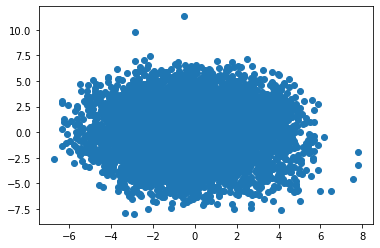

In [40]:
h = encoder.predict(result_vector_embedding, batch_size=batch_size)
plt.scatter(h[:, 0], h[:, 1])